In [1]:
from scipy.ndimage.measurements import label as bwlabel
from skimage.measure import regionprops
from skimage.color import label2rgb
from pylab import *


%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
rcParams['figure.figsize'] = (12, 8)
rcParams['font.size'] = 16

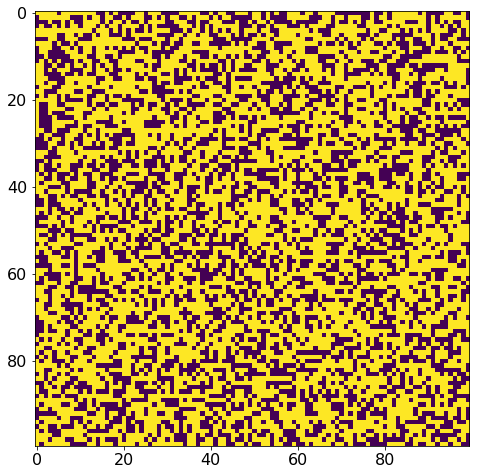

In [3]:
L = 100

r = rand(L, L)
p = 0.6

z = r < p
lw, num = bwlabel(z)

imshow(z)
show()

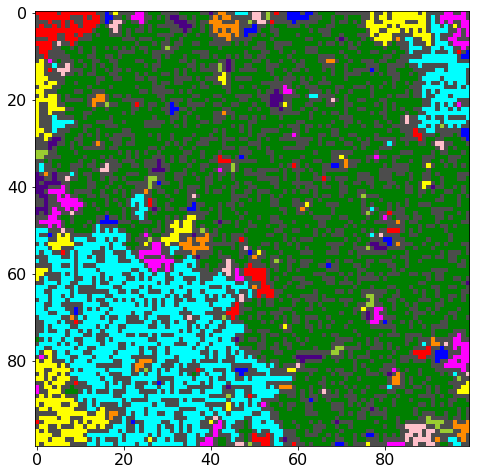

In [4]:
img = label2rgb(lw, bg_label=0, bg_color=[0.3, 0.3, 0.3])
imshow(img)
show()

In [5]:
s = regionprops(lw)
area = [s[i]['area'] for i in range(len(s))]
bbox = [s[i]['bbox'] for i in range(len(s))]


In [6]:
print(area[:10])
print(bbox[:10])

[75, 4, 1, 6, 3560, 1, 4, 3, 6, 2]
[(0L, 0L, 11L, 15L), (0L, 16L, 3L, 18L), (0L, 18L, 1L, 19L), (0L, 22L, 3L, 25L), (0L, 4L, 100L, 100L), (0L, 40L, 1L, 41L), (0L, 42L, 2L, 45L), (0L, 46L, 1L, 49L), (0L, 50L, 3L, 53L), (0L, 53L, 2L, 54L)]


In [14]:
def percolation_matrix(p, Lx, Ly=None):
    Ly = Lx if Ly is None else Ly 
    r = rand(L, L)
    z = r < p
    lw, num = bwlabel(z)
    return lw, num
            

def probs_calculate(ps, Lx, Ly=None, simulation_per_p=10):
    Ly = Lx if Ly is None else Ly
    total_area = Lx*Ly
    
    P = zeros(len(ps))
    Pie = zeros(len(ps))

    for i, pi in enumerate(ps):
        simulation_i = 0

        while simulation_per_p > simulation_i:
            lw, num = percolation_matrix(pi, Lx, Ly)
            cluster_infos = regionprops(lw)

            areas = array([cluster_infos[k]['area'] for k in range(len(cluster_infos))])
            bboxs = array([cluster_infos[k]['bbox'] for k in range(len(cluster_infos))]).astype(int)

            for j, bbox in enumerate(bboxs):
                spansx = bbox[2] - bbox[0] # Xmax - Xmin
                spansy = bbox[3] - bbox[1] # Ymax - Ymin

                if spansx >= Lx or spansy >= Ly:
                    P[i] += areas[j]
                    Pie[i] = 1.
            simulation_i += 1

        Pie[i] /= simulation_per_p
        P[i] /= simulation_per_p * total_area
    return P, Pie


number_of_p = 100 
ps = [float(i)/number_of_p for i in range(number_of_p)]

Lx = 100
Ly = 100

simulation_per_p = 10

P, Pie = probs_calculate(ps, Lx, Ly, simulation_per_p)

In [15]:
import seaborn as sns
sns.set()
sns.set_context("paper", rc={"axes.labelsize":20})
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})

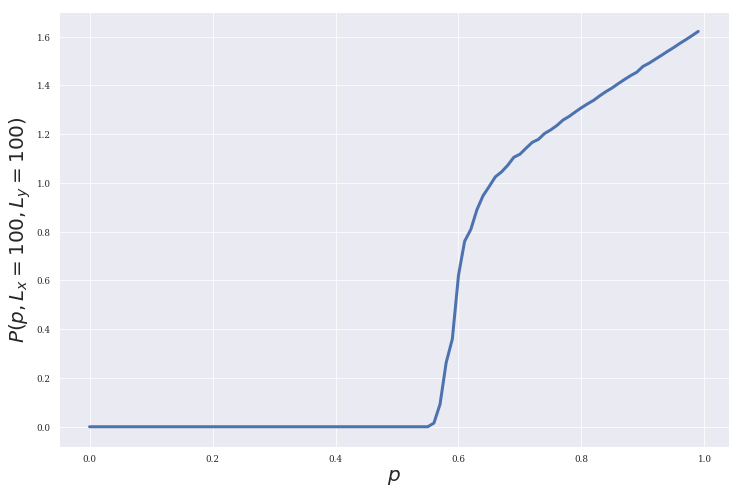

In [16]:
lplot = sns.lineplot(ps, P, lw=3)
lplot.set_xlabel(r"$p$")
lplot.set_ylabel(r"$P(p, L_x={}, L_y={})$".format(Lx, Ly))
show()

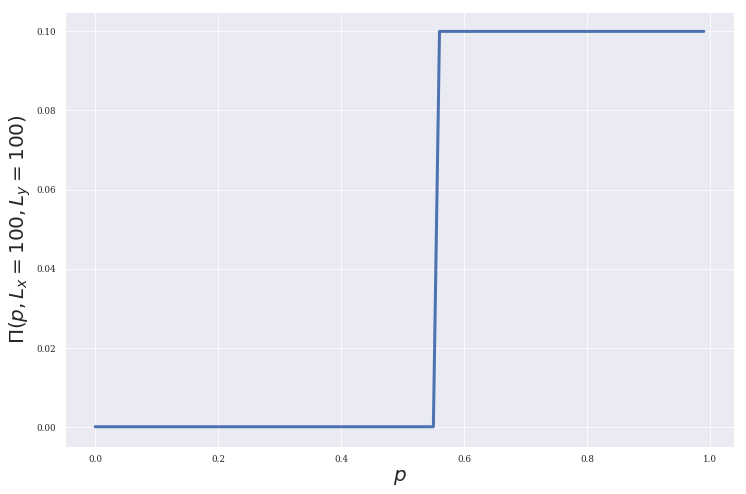

In [17]:
lplot = sns.lineplot(ps, Pie, lw=3)
lplot.set_xlabel("$p$")
lplot.set_ylabel(r"$\Pi(p, L_x={}, L_y={})$".format(Lx, Ly))
show()

In [11]:
Ls = [2**i for i in range(1, 8)]
Ps = []
Pies = []

for L in Ls:
    P, Pie = probs_calculate(ps, L)
    Ps.append(P)
    Pies.append(Pie)

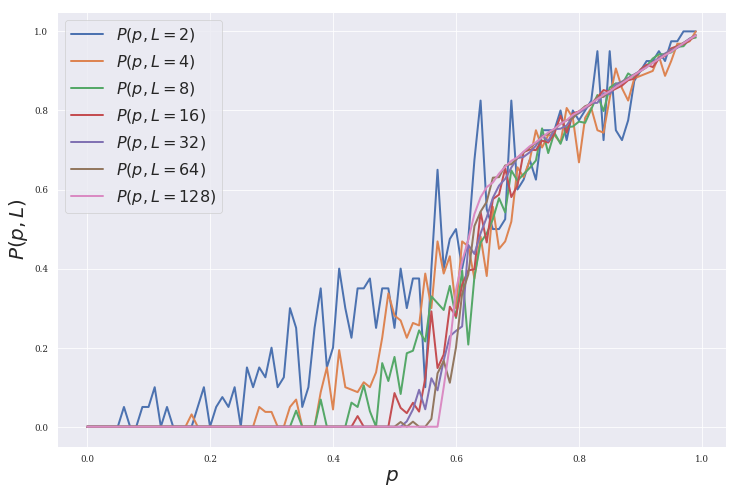

In [12]:
for i, P in enumerate(Ps):
    lplot = sns.lineplot(ps, P, lw=2, label=r'$P(p, L={})$'.format(Ls[i]))

lplot.set_xlabel(r"$p$")
lplot.set_ylabel(r"$P(p, L)$")
legend(fontsize=16)
show()

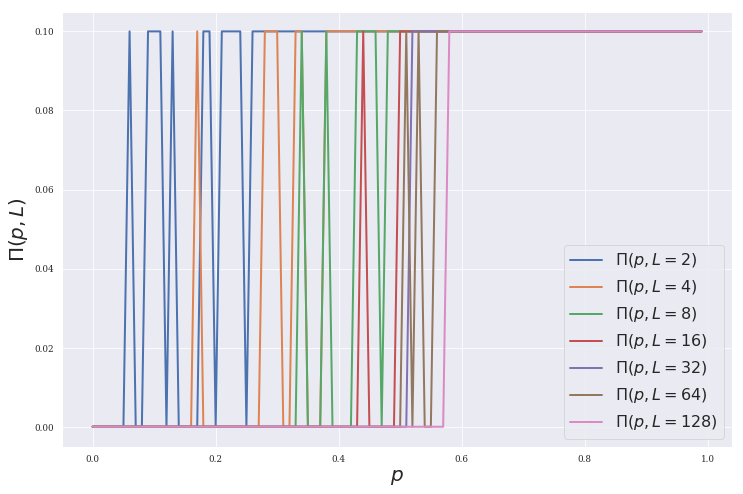

In [13]:
for i, Pie in enumerate(Pies):
    lplot = sns.lineplot(ps, Pie, lw=2, label=r'$\Pi(p, L={})$'.format(Ls[i]))

lplot.set_xlabel(r"$p$")
lplot.set_ylabel(r"$\Pi(p, L)$")
legend(fontsize=16)
show()